In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
#XLSX 파일 로드
df = pd.read_excel('https://github.com/rlacltkqkfaus/dasan/raw/main/22%ED%95%99%EB%85%84%EB%8F%84%202%ED%95%99%EA%B8%B0%20%EC%97%B4%EB%9E%8C%EC%8B%A4%20%EC%82%AC%EC%9A%A9%EB%82%B4%EC%97%AD.xlsx')

In [3]:
# xlsx파일인 df를 CSV 파일로 변환 - 데이터프레임화 (한글 인코딩은 utf-8-sig 사용)
df.to_csv('file.csv', encoding='utf-8-sig', index=False)

In [4]:

# 컬럼명 변경
df = df.rename(columns={
    "분관명": "Department",
    "층": "Floor",
    "공간명": "Room",
    "좌석번호": "SeatNumber",
    "이용시작시간": "Start",
    "이용종료시간": "End",
    "반납일": "EndDate"
})

# 변경된 컬럼명 확인
print(df.columns)

Index(['Department', 'Floor', 'Room', 'SeatNumber', 'Start', 'End', 'EndDate'], dtype='object')


In [5]:
df.head()

,Department,Floor,Room,SeatNumber,Start,End,EndDate
0,다산정보관,1층,제1열람실,280,2022-12-16 20:58:00,2022-12-16 23:54:05,2022-12-16 23:54:05
1,다산정보관,1층,제1열람실,278,2022-12-16 20:58:00,2022-12-16 20:58:47,2022-12-16 20:58:47
2,다산정보관,1층,제1열람실,216,2022-12-16 20:54:00,2022-12-16 22:55:38,2022-12-16 22:55:38
3,다산정보관,1층,개방형열람석(2층),10,2022-12-16 20:16:00,2022-12-16 22:13:06,2022-12-16 22:13:06
4,다산정보관,1층,개방형열람석(2층),1,2022-12-16 19:41:00,2022-12-16 22:36:05,2022-12-16 22:36:05


In [6]:
df.describe()

,SeatNumber
count,66967.000000
mean,117.886392
std,85.195196
min,1.000000
25%,40.000000
50%,112.000000
75%,184.000000
max,290.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66967 entries, 0 to 66966
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Department  66967 non-null  object
 1   Floor       66967 non-null  object
 2   Room        66967 non-null  object
 3   SeatNumber  66967 non-null  int64 
 4   Start       66967 non-null  object
 5   End         66967 non-null  object
 6   EndDate     66967 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.6+ MB


In [8]:
df.shape

(66967, 7)

In [9]:
df2 = df.drop(['EndDate'], axis=1) #end date열 제거된 데이터프레임을 df2에 저장
df2 = df2.drop(['Department'], axis=1) # department 열 제거 
df2 = df2.drop(['Floor'], axis=1) # Floor 열 제거
df2 = df2.sort_values(by='Start', ascending=True) #시간순으로 정렬


In [10]:
df2.head()

,Room,SeatNumber,Start,End
66966,제3열람실,64,2022-08-29 00:15:00,2022-08-29 03:48:39
66965,제1열람실,276,2022-08-29 02:46:00,2022-08-29 05:09:07
66964,제1열람실,183,2022-08-29 04:38:00,2022-08-29 06:23:17
66963,개방형열람석(1층),7,2022-08-29 07:06:00,2022-08-29 08:13:21
66962,제1열람실,276,2022-08-29 07:13:00,2022-08-29 07:13:27


In [11]:
df2['Room'].replace('제1열람실', 'room1', inplace=True) # df2 데이터프레임에서 Room열의 행 중 '제1열람실'을 'room1'으로 대체
df2['Room'].replace('제2열람실', 'room2', inplace=True)
df2['Room'].replace('제3열람실', 'room3', inplace=True)
df2['Room'].replace('개방형열람석(1층)', 'open1', inplace=True)
df2['Room'].replace('개방형열람석(2층)', 'open2', inplace=True)
df2.head()

,Room,SeatNumber,Start,End
66966,room3,64,2022-08-29 00:15:00,2022-08-29 03:48:39
66965,room1,276,2022-08-29 02:46:00,2022-08-29 05:09:07
66964,room1,183,2022-08-29 04:38:00,2022-08-29 06:23:17
66963,open1,7,2022-08-29 07:06:00,2022-08-29 08:13:21
66962,room1,276,2022-08-29 07:13:00,2022-08-29 07:13:27


In [12]:
df3 = df2.copy() # df2를 df3로 복사
df3.head()

,Room,SeatNumber,Start,End
66966,room3,64,2022-08-29 00:15:00,2022-08-29 03:48:39
66965,room1,276,2022-08-29 02:46:00,2022-08-29 05:09:07
66964,room1,183,2022-08-29 04:38:00,2022-08-29 06:23:17
66963,open1,7,2022-08-29 07:06:00,2022-08-29 08:13:21
66962,room1,276,2022-08-29 07:13:00,2022-08-29 07:13:27


In [13]:
df3['Start'] = pd.to_datetime(df3['Start']) # 타입이 object인 Start 열의 데이터를 datetime 형식으로 변환 - 사칙연산이 가능하도록
df3['End'] = pd.to_datetime(df3['End'])
df3

,Room,SeatNumber,Start,End
66966,room3,64,2022-08-29 00:15:00,2022-08-29 03:48:39
66965,room1,276,2022-08-29 02:46:00,2022-08-29 05:09:07
66964,room1,183,2022-08-29 04:38:00,2022-08-29 06:23:17
66963,open1,7,2022-08-29 07:06:00,2022-08-29 08:13:21
66962,room1,276,2022-08-29 07:13:00,2022-08-29 07:13:27
...,...,...,...,...
4,open2,1,2022-12-16 19:41:00,2022-12-16 22:36:05
3,open2,10,2022-12-16 20:16:00,2022-12-16 22:13:06
2,room1,216,2022-12-16 20:54:00,2022-12-16 22:55:38
1,room1,278,2022-12-16 20:58:00,2022-12-16 20:58:47


In [14]:
df3['Start_dtdate'] = pd.to_datetime(df3['Start']).dt.date
df3['Start_dttime'] = pd.to_datetime(df3['Start']).dt.time
df3['End_dtdate'] = pd.to_datetime(df3['End']).dt.date
df3['End_dttime'] = pd.to_datetime(df3['End']).dt.time
df3.head()

,Room,SeatNumber,Start,End,Start_dtdate,Start_dttime,End_dtdate,End_dttime
66966,room3,64,2022-08-29 00:15:00,2022-08-29 03:48:39,2022-08-29,00:15:00,2022-08-29,03:48:39
66965,room1,276,2022-08-29 02:46:00,2022-08-29 05:09:07,2022-08-29,02:46:00,2022-08-29,05:09:07
66964,room1,183,2022-08-29 04:38:00,2022-08-29 06:23:17,2022-08-29,04:38:00,2022-08-29,06:23:17
66963,open1,7,2022-08-29 07:06:00,2022-08-29 08:13:21,2022-08-29,07:06:00,2022-08-29,08:13:21
66962,room1,276,2022-08-29 07:13:00,2022-08-29 07:13:27,2022-08-29,07:13:00,2022-08-29,07:13:27


In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66967 entries, 66966 to 0
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Room          66967 non-null  object        
 1   SeatNumber    66967 non-null  int64         
 2   Start         66967 non-null  datetime64[ns]
 3   End           66967 non-null  datetime64[ns]
 4   Start_dtdate  66967 non-null  object        
 5   Start_dttime  66967 non-null  object        
 6   End_dtdate    66967 non-null  object        
 7   End_dttime    66967 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 4.6+ MB


In [16]:
df3['UseTime'] = df3['End'] - df3['Start'] # 사용종료시간에서 사용시작시간을 뺀 값을 이용시간UseTime 열 생성하여 입력
df3.head()

,Room,SeatNumber,Start,End,Start_dtdate,Start_dttime,End_dtdate,End_dttime,UseTime
66966,room3,64,2022-08-29 00:15:00,2022-08-29 03:48:39,2022-08-29,00:15:00,2022-08-29,03:48:39,0 days 03:33:39
66965,room1,276,2022-08-29 02:46:00,2022-08-29 05:09:07,2022-08-29,02:46:00,2022-08-29,05:09:07,0 days 02:23:07
66964,room1,183,2022-08-29 04:38:00,2022-08-29 06:23:17,2022-08-29,04:38:00,2022-08-29,06:23:17,0 days 01:45:17
66963,open1,7,2022-08-29 07:06:00,2022-08-29 08:13:21,2022-08-29,07:06:00,2022-08-29,08:13:21,0 days 01:07:21
66962,room1,276,2022-08-29 07:13:00,2022-08-29 07:13:27,2022-08-29,07:13:00,2022-08-29,07:13:27,0 days 00:00:27


In [17]:
#시간 단위를 분으로 변경
df3['Minute'] = df3['UseTime'].dt.seconds/60
#요일 칼럼 추가
df3['Dayname'] = df3['Start'].dt.day_name()
df3

,Room,SeatNumber,Start,End,Start_dtdate,Start_dttime,End_dtdate,End_dttime,UseTime,Minute,Dayname
66966,room3,64,2022-08-29 00:15:00,2022-08-29 03:48:39,2022-08-29,00:15:00,2022-08-29,03:48:39,0 days 03:33:39,213.650000,Monday
66965,room1,276,2022-08-29 02:46:00,2022-08-29 05:09:07,2022-08-29,02:46:00,2022-08-29,05:09:07,0 days 02:23:07,143.116667,Monday
66964,room1,183,2022-08-29 04:38:00,2022-08-29 06:23:17,2022-08-29,04:38:00,2022-08-29,06:23:17,0 days 01:45:17,105.283333,Monday
66963,open1,7,2022-08-29 07:06:00,2022-08-29 08:13:21,2022-08-29,07:06:00,2022-08-29,08:13:21,0 days 01:07:21,67.350000,Monday
66962,room1,276,2022-08-29 07:13:00,2022-08-29 07:13:27,2022-08-29,07:13:00,2022-08-29,07:13:27,0 days 00:00:27,0.450000,Monday
...,...,...,...,...,...,...,...,...,...,...,...
4,open2,1,2022-12-16 19:41:00,2022-12-16 22:36:05,2022-12-16,19:41:00,2022-12-16,22:36:05,0 days 02:55:05,175.083333,Friday
3,open2,10,2022-12-16 20:16:00,2022-12-16 22:13:06,2022-12-16,20:16:00,2022-12-16,22:13:06,0 days 01:57:06,117.100000,Friday
2,room1,216,2022-12-16 20:54:00,2022-12-16 22:55:38,2022-12-16,20:54:00,2022-12-16,22:55:38,0 days 02:01:38,121.633333,Friday
1,room1,278,2022-12-16 20:58:00,2022-12-16 20:58:47,2022-12-16,20:58:00,2022-12-16,20:58:47,0 days 00:00:47,0.783333,Friday


In [18]:
room1 = df3.loc[df3['Room'] == 'room1'] # df3의 Room열 중 값이 room1인 행만 추출하여 room1이라는 데이터프레임에 저장
room1.head()

,Room,SeatNumber,Start,End,Start_dtdate,Start_dttime,End_dtdate,End_dttime,UseTime,Minute,Dayname
66965,room1,276,2022-08-29 02:46:00,2022-08-29 05:09:07,2022-08-29,02:46:00,2022-08-29,05:09:07,0 days 02:23:07,143.116667,Monday
66964,room1,183,2022-08-29 04:38:00,2022-08-29 06:23:17,2022-08-29,04:38:00,2022-08-29,06:23:17,0 days 01:45:17,105.283333,Monday
66962,room1,276,2022-08-29 07:13:00,2022-08-29 07:13:27,2022-08-29,07:13:00,2022-08-29,07:13:27,0 days 00:00:27,0.450000,Monday
66959,room1,276,2022-08-29 07:37:00,2022-08-29 13:29:41,2022-08-29,07:37:00,2022-08-29,13:29:41,0 days 05:52:41,352.683333,Monday
66958,room1,282,2022-08-29 07:37:00,2022-08-29 12:51:58,2022-08-29,07:37:00,2022-08-29,12:51:58,0 days 05:14:58,314.966667,Monday


In [19]:
room1 = room1.drop(['Room'], axis=1) # room1 데이터프레임에서 Room 열을 제거 - 1열람실 데이터만 모아뒀으니까
room1.head()

,SeatNumber,Start,End,Start_dtdate,Start_dttime,End_dtdate,End_dttime,UseTime,Minute,Dayname
66965,276,2022-08-29 02:46:00,2022-08-29 05:09:07,2022-08-29,02:46:00,2022-08-29,05:09:07,0 days 02:23:07,143.116667,Monday
66964,183,2022-08-29 04:38:00,2022-08-29 06:23:17,2022-08-29,04:38:00,2022-08-29,06:23:17,0 days 01:45:17,105.283333,Monday
66962,276,2022-08-29 07:13:00,2022-08-29 07:13:27,2022-08-29,07:13:00,2022-08-29,07:13:27,0 days 00:00:27,0.450000,Monday
66959,276,2022-08-29 07:37:00,2022-08-29 13:29:41,2022-08-29,07:37:00,2022-08-29,13:29:41,0 days 05:52:41,352.683333,Monday
66958,282,2022-08-29 07:37:00,2022-08-29 12:51:58,2022-08-29,07:37:00,2022-08-29,12:51:58,0 days 05:14:58,314.966667,Monday


In [20]:
room2 = df3.loc[df3['Room'] == 'room2'] # df3의 Room열 중 값이 room2인 행만 추출하여 room2이라는 데이터프레임에 저장
room2 = room2.drop(['Room'], axis=1) # room2 데이터프레임에서 Room 열을 제거 - 2열람실 데이터만 모아뒀으니까
room2.head()

,SeatNumber,Start,End,Start_dtdate,Start_dttime,End_dtdate,End_dttime,UseTime,Minute,Dayname
66960,89,2022-08-29 07:29:00,2022-08-29 10:42:05,2022-08-29,07:29:00,2022-08-29,10:42:05,0 days 03:13:05,193.083333,Monday
66948,1,2022-08-29 08:45:00,2022-08-29 10:40:19,2022-08-29,08:45:00,2022-08-29,10:40:19,0 days 01:55:19,115.316667,Monday
66944,198,2022-08-29 08:59:00,2022-08-29 11:07:43,2022-08-29,08:59:00,2022-08-29,11:07:43,0 days 02:08:43,128.716667,Monday
66938,176,2022-08-29 09:18:00,2022-08-29 11:43:58,2022-08-29,09:18:00,2022-08-29,11:43:58,0 days 02:25:58,145.966667,Monday
66926,85,2022-08-29 09:51:00,2022-08-29 10:29:48,2022-08-29,09:51:00,2022-08-29,10:29:48,0 days 00:38:48,38.800000,Monday


In [21]:
room3 = df3.loc[df3['Room'] == 'room3'] # 3열람실 동일하게
room3 = room3.drop(['Room'], axis=1)
room3.head()

,SeatNumber,Start,End,Start_dtdate,Start_dttime,End_dtdate,End_dttime,UseTime,Minute,Dayname
66966,64,2022-08-29 00:15:00,2022-08-29 03:48:39,2022-08-29,00:15:00,2022-08-29,03:48:39,0 days 03:33:39,213.650000,Monday
66961,77,2022-08-29 07:22:00,2022-08-29 09:31:52,2022-08-29,07:22:00,2022-08-29,09:31:52,0 days 02:09:52,129.866667,Monday
66942,64,2022-08-29 09:10:00,2022-08-29 10:00:52,2022-08-29,09:10:00,2022-08-29,10:00:52,0 days 00:50:52,50.866667,Monday
66937,38,2022-08-29 09:18:00,2022-08-29 14:45:49,2022-08-29,09:18:00,2022-08-29,14:45:49,0 days 05:27:49,327.816667,Monday
66934,164,2022-08-29 09:29:00,2022-08-29 14:56:34,2022-08-29,09:29:00,2022-08-29,14:56:34,0 days 05:27:34,327.566667,Monday


In [22]:
open1 = df3.loc[df3['Room'] == 'open1'] # 개방형 1층
open1 = open1.drop(['Room'], axis=1)
open1.head()

,SeatNumber,Start,End,Start_dtdate,Start_dttime,End_dtdate,End_dttime,UseTime,Minute,Dayname
66963,7,2022-08-29 07:06:00,2022-08-29 08:13:21,2022-08-29,07:06:00,2022-08-29,08:13:21,0 days 01:07:21,67.350000,Monday
66928,16,2022-08-29 09:49:00,2022-08-29 11:16:23,2022-08-29,09:49:00,2022-08-29,11:16:23,0 days 01:27:23,87.383333,Monday
66924,9,2022-08-29 09:53:00,2022-08-29 10:40:27,2022-08-29,09:53:00,2022-08-29,10:40:27,0 days 00:47:27,47.450000,Monday
66901,1,2022-08-29 11:52:00,2022-08-29 14:51:05,2022-08-29,11:52:00,2022-08-29,14:51:05,0 days 02:59:05,179.083333,Monday
66902,7,2022-08-29 11:52:00,2022-08-29 13:40:36,2022-08-29,11:52:00,2022-08-29,13:40:36,0 days 01:48:36,108.600000,Monday


In [23]:
open2 = df3.loc[df3['Room'] == 'open2'] # 개방형 2층
open2 = open2.drop(['Room'], axis=1)
open2.head()

,SeatNumber,Start,End,Start_dtdate,Start_dttime,End_dtdate,End_dttime,UseTime,Minute,Dayname
66950,1,2022-08-29 08:39:00,2022-08-29 09:37:06,2022-08-29,08:39:00,2022-08-29,09:37:06,0 days 00:58:06,58.100000,Monday
66940,8,2022-08-29 09:14:00,2022-08-29 12:12:05,2022-08-29,09:14:00,2022-08-29,12:12:05,0 days 02:58:05,178.083333,Monday
66939,18,2022-08-29 09:15:00,2022-08-29 10:48:46,2022-08-29,09:15:00,2022-08-29,10:48:46,0 days 01:33:46,93.766667,Monday
66935,9,2022-08-29 09:27:00,2022-08-29 11:19:40,2022-08-29,09:27:00,2022-08-29,11:19:40,0 days 01:52:40,112.666667,Monday
66925,1,2022-08-29 09:51:00,2022-08-29 12:25:00,2022-08-29,09:51:00,2022-08-29,12:25:00,0 days 02:34:00,154.000000,Monday


 **열람실별>요일별 이용현황** 
*   **열람실 상관없이 '화요일'에 가장 많이 이용이 많았음**
*   **일주일 수업이 끝나서 본가로 내려갈 수 있는 '금요일'과 '토요일'이 이용이 가장 적었음** 

In [24]:
room1['Dayname'].value_counts()

Tuesday      7217
Monday       6772
Wednesday    6687
Thursday     5232
Sunday       4876
Saturday     3759
Friday       3709
Name: Dayname, dtype: int64

In [25]:
room2['Dayname'].value_counts()

Tuesday      2368
Monday       2268
Wednesday    2187
Sunday       1656
Thursday     1607
Saturday     1292
Friday       1151
Name: Dayname, dtype: int64

In [26]:
room3['Dayname'].value_counts()

Tuesday      1572
Monday       1473
Wednesday    1314
Sunday       1080
Thursday     1015
Saturday      829
Friday        724
Name: Dayname, dtype: int64

In [27]:
open1['Dayname'].value_counts()

Tuesday      720
Monday       635
Wednesday    632
Thursday     493
Sunday       355
Friday       333
Saturday     258
Name: Dayname, dtype: int64

In [28]:
open2['Dayname'].value_counts()

Tuesday      921
Wednesday    870
Monday       832
Thursday     710
Sunday       534
Friday       462
Saturday     424
Name: Dayname, dtype: int64

**열람실별>요일별 이용현황 시각화**

<Axes: >

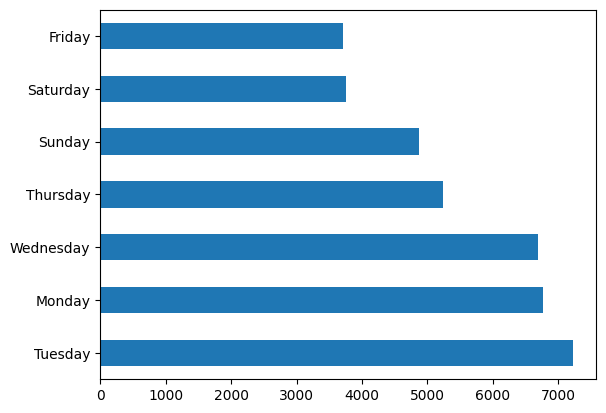

In [29]:
room1['Dayname'].value_counts().plot.barh()

<Axes: >

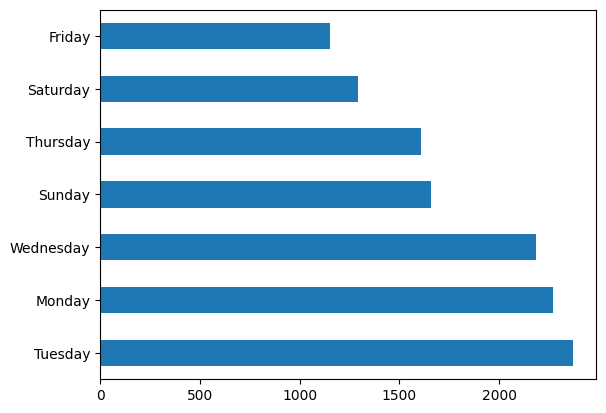

In [30]:
room2['Dayname'].value_counts().plot.barh()

<Axes: >

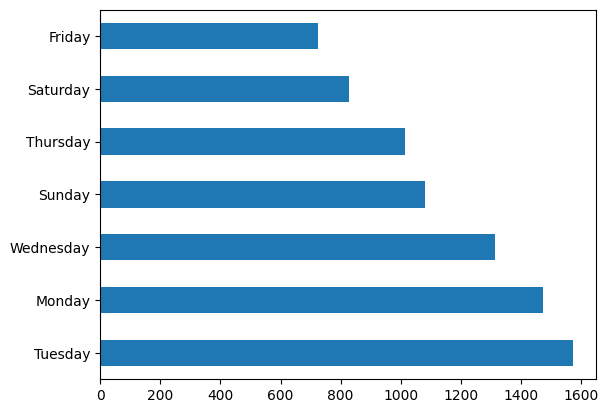

In [31]:
room3['Dayname'].value_counts().plot.barh()

<Axes: >

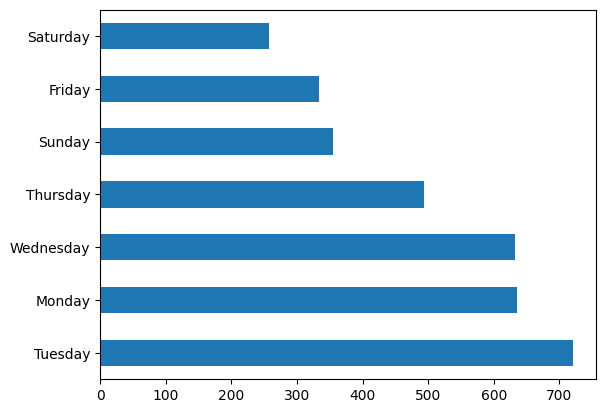

In [32]:
open1['Dayname'].value_counts().plot.barh()

<Axes: >

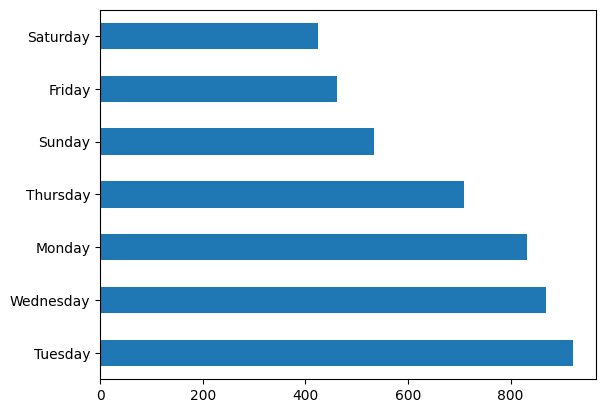

In [33]:
open2['Dayname'].value_counts().plot.barh()

**시간대별 이용빈도(제1열람실)**

In [34]:
#제1열람실 시간대별 이용빈도
room1['Time'] = pd.to_datetime(room1['Start']).dt.hour
room1['Usage'] = 1
room1.loc[room1['End_dttime']<room1['Start_dttime'], 'Usage'] = 0
room1[['Time', 'Usage']]

,Time,Usage
66965,2,1
66964,4,1
66962,7,1
66959,7,1
66958,7,1
...,...,...
6,17,1
5,19,1
2,20,1
1,20,1


In [35]:
#제1열람실 시간대별 이용빈도(Mon)
room1_Mon=room1[room1['Dayname']=='Monday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
room1_Mon['Start'] = pd.to_datetime(room1_Mon['Start'])
room1_Mon['End'] = pd.to_datetime(room1_Mon['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in room1_Mon.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

<ipython-input-35-23bc87d04e26>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  room1_Mon['Start'] = pd.to_datetime(room1_Mon['Start'])
<ipython-input-35-23bc87d04e26>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  room1_Mon['End'] = pd.to_datetime(room1_Mon['End'])


        Time  Usage Count
0   00:00:00          174
1   01:00:00          237
2   02:00:00          252
3   03:00:00          236
4   04:00:00          194
5   05:00:00          181
6   06:00:00          186
7   07:00:00          200
8   08:00:00          361
9   09:00:00          515
10  10:00:00          698
11  11:00:00          745
12  12:00:00         1063
13  13:00:00         1311
14  14:00:00         1351
15  15:00:00         1607
16  16:00:00         1559
17  17:00:00         1827
18  18:00:00         1868
19  19:00:00         1829
20  20:00:00         1753
21  21:00:00         1496
22  22:00:00         1042
23  23:00:00          570


In [ ]:
#제1열람실 시간대별 이용빈도(Tue)
room1_Tue=room1[room1['Dayname']=='Tuesday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
room1_Tue['Start'] = pd.to_datetime(room1_Tue['Start'])
room1_Tue['End'] = pd.to_datetime(room1_Tue['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in room1_Tue.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

<ipython-input-36-37db42441e15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  room1_Tue['Start'] = pd.to_datetime(room1_Tue['Start'])
<ipython-input-36-37db42441e15>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  room1_Tue['End'] = pd.to_datetime(room1_Tue['End'])


In [ ]:
#제1열람실 시간대별 이용빈도(Wed)
room1_Wed=room1[room1['Dayname']=='Wednesday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
room1_Wed['Start'] = pd.to_datetime(room1_Wed['Start'])
room1_Wed['End'] = pd.to_datetime(room1_Wed['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in room1_Wed.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#제1열람실 시간대별 이용빈도(Thu)
room1_Thur=room1[room1['Dayname']=='Thursday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
room1_Thur['Start'] = pd.to_datetime(room1_Thur['Start'])
room1_Thur['End'] = pd.to_datetime(room1_Thur['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in room1_Thur.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#제1열람실 시간대별 이용빈도(Fri)
room1_Fri=room1[room1['Dayname']=='Friday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
room1_Fri['Start'] = pd.to_datetime(room1_Fri['Start'])
room1_Fri['End'] = pd.to_datetime(room1_Fri['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in room1_Fri.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#제1열람실 시간대별 이용빈도(Sat)
room1_Sat=room1[room1['Dayname']=='Saturday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
room1_Sat['Start'] = pd.to_datetime(room1_Sat['Start'])
room1_Sat['End'] = pd.to_datetime(room1_Sat['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in room1_Sat.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#제1열람실 시간대별 이용빈도(Sun)
room1_Sun=room1[room1['Dayname']=='Sunday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
room1_Sun['Start'] = pd.to_datetime(room1_Sun['Start'])
room1_Sun['End'] = pd.to_datetime(room1_Sun['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in room1_Sun.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#제2열람실 시간대별 이용빈도(Mon)
room2_Mon=room2[room2['Dayname']=='Monday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
room2_Mon['Start'] = pd.to_datetime(room2_Mon['Start'])
room2_Mon['End'] = pd.to_datetime(room2_Mon['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in room2_Mon.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#제2열람실 시간대별 이용빈도(Tue)
room2_Tue=room2[room2['Dayname']=='Tuesday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
room2_Tue['Start'] = pd.to_datetime(room2_Tue['Start'])
room2_Tue['End'] = pd.to_datetime(room2_Tue['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in room2_Tue.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#제2열람실 시간대별 이용빈도(Wed)
room2_Wed=room2[room2['Dayname']=='Wednesday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
room2_Wed['Start'] = pd.to_datetime(room2_Wed['Start'])
room2_Wed['End'] = pd.to_datetime(room2_Wed['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in room2_Wed.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#제2열람실 시간대별 이용빈도(Thu)
room2_Thu=room2[room2['Dayname']=='Thursday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
room2_Thu['Start'] = pd.to_datetime(room2_Thu['Start'])
room2_Thu['End'] = pd.to_datetime(room2_Thu['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in room2_Thu.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#제2열람실 시간대별 이용빈도(Fri)
room2_Fri=room2[room2['Dayname']=='Friday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
room2_Fri['Start'] = pd.to_datetime(room2_Fri['Start'])
room2_Fri['End'] = pd.to_datetime(room2_Fri['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in room2_Fri.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#제2열람실 시간대별 이용빈도(Sat)
room2_Sat=room2[room2['Dayname']=='Saturday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
room2_Sat['Start'] = pd.to_datetime(room2_Sat['Start'])
room2_Sat['End'] = pd.to_datetime(room2_Sat['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in room2_Sat.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#제2열람실 시간대별 이용빈도(Sun)
room2_Sun=room2[room2['Dayname']=='Sunday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
room2_Sun['Start'] = pd.to_datetime(room2_Sun['Start'])
room2_Sun['End'] = pd.to_datetime(room2_Sun['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in room2_Sun.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#제3열람실 시간대별 이용빈도(Mon)
room3_Mon=room3[room3['Dayname']=='Monday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
room3_Mon['Start'] = pd.to_datetime(room3_Mon['Start'])
room3_Mon['End'] = pd.to_datetime(room3_Mon['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in room3_Mon.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#제3열람실 시간대별 이용빈도(Tue)
room3_Tue=room3[room3['Dayname']=='Tuesday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
room3_Tue['Start'] = pd.to_datetime(room3_Tue['Start'])
room3_Tue['End'] = pd.to_datetime(room3_Tue['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in room3_Tue.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#제3열람실 시간대별 이용빈도(Wed)
room3_Wed=room3[room3['Dayname']=='Wednesday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
room3_Wed['Start'] = pd.to_datetime(room3_Wed['Start'])
room3_Wed['End'] = pd.to_datetime(room3_Wed['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in room3_Wed.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#제3열람실 시간대별 이용빈도(Thu)
room3_Thu=room3[room3['Dayname']=='Thursday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
room3_Thu['Start'] = pd.to_datetime(room3_Thu['Start'])
room3_Thu['End'] = pd.to_datetime(room3_Thu['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in room3_Thu.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#제3열람실 시간대별 이용빈도(Fri)
room3_Fri=room3[room3['Dayname']=='Friday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
room3_Fri['Start'] = pd.to_datetime(room3_Fri['Start'])
room3_Fri['End'] = pd.to_datetime(room3_Fri['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in room3_Fri.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#제3열람실 시간대별 이용빈도(Sat)
room3_Sat=room3[room3['Dayname']=='Saturday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
room3_Sat['Start'] = pd.to_datetime(room3_Sat['Start'])
room3_Sat['End'] = pd.to_datetime(room3_Sat['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in room3_Sat.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#제3열람실 시간대별 이용빈도(Sun)
room3_Sun=room3[room3['Dayname']=='Sunday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
room3_Sun['Start'] = pd.to_datetime(room3_Sun['Start'])
room3_Sun['End'] = pd.to_datetime(room3_Sun['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in room3_Sun.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#개방형 1열람실 시간대별 이용빈도(Mon)
open1_Mon=open1[open1['Dayname']=='Monday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
open1_Mon['Start'] = pd.to_datetime(open1_Mon['Start'])
open1_Mon['End'] = pd.to_datetime(open1_Mon['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in open1_Mon.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#개방형 1열람실 시간대별 이용빈도(Tue)
open1_Tue=open1[open1['Dayname']=='Monday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
open1_Tue['Start'] = pd.to_datetime(open1_Tue['Start'])
open1_Tue['End'] = pd.to_datetime(open1_Tue['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in open1_Tue.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#개방형 1열람실 시간대별 이용빈도(Wed)
open1_Wed=open1[open1['Dayname']=='Wednesday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
open1_Wed['Start'] = pd.to_datetime(open1_Wed['Start'])
open1_Wed['End'] = pd.to_datetime(open1_Wed['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in open1_Wed.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#개방형 1열람실 시간대별 이용빈도(Thu)
open1_Thu=open1[open1['Dayname']=='Thursday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
open1_Thu['Start'] = pd.to_datetime(open1_Thu['Start'])
open1_Thu['End'] = pd.to_datetime(open1_Thu['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in open1_Thu.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#개방형 1열람실 시간대별 이용빈도(Fri)
open1_Fri=open1[open1['Dayname']=='Friday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
open1_Fri['Start'] = pd.to_datetime(open1_Fri['Start'])
open1_Fri['End'] = pd.to_datetime(open1_Fri['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in open1_Fri.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#개방형 1열람실 시간대별 이용빈도(Sat)
open1_Sat=open1[open1['Dayname']=='Saturday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
open1_Sat['Start'] = pd.to_datetime(open1_Sat['Start'])
open1_Sat['End'] = pd.to_datetime(open1_Sat['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in open1_Sat.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#개방형 1열람실 시간대별 이용빈도(Sun)
open1_Sun=open1[open1['Dayname']=='Sunday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
open1_Sun['Start'] = pd.to_datetime(open1_Sun['Start'])
open1_Sun['End'] = pd.to_datetime(open1_Sun['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in open1_Sun.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#개방형 열람실 2층 시간대별 이용빈도(Mon)
open2_Mon=open2[open2['Dayname']=='Monday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
open2_Mon['Start'] = pd.to_datetime(open2_Mon['Start'])
open2_Mon['End'] = pd.to_datetime(open2_Mon['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in open2_Mon.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#개방형 열람실 2층 시간대별 이용빈도(Tue)
open2_Tue=open2[open2['Dayname']=='Tuesday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
open2_Tue['Start'] = pd.to_datetime(open2_Tue['Start'])
open2_Tue['End'] = pd.to_datetime(open2_Tue['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in open2_Tue.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#개방형 열람실 2층 시간대별 이용빈도(Wed)
open2_Wed=open2[open2['Dayname']=='Wednesday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
open2_Wed['Start'] = pd.to_datetime(open2_Wed['Start'])
open2_Wed['End'] = pd.to_datetime(open2_Wed['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in open2_Wed.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#개방형 열람실 2층 시간대별 이용빈도(Thu)
open2_Thu=open2[open2['Dayname']=='Thursday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
open2_Thu['Start'] = pd.to_datetime(open2_Thu['Start'])
open2_Thu['End'] = pd.to_datetime(open2_Thu['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in open2_Thu.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#개방형 열람실 2층 시간대별 이용빈도(Fri)
open2_Fri=open2[open2['Dayname']=='Friday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
open2_Fri['Start'] = pd.to_datetime(open2_Fri['Start'])
open2_Fri['End'] = pd.to_datetime(open2_Fri['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in open2_Fri.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#개방형 열람실 2층 시간대별 이용빈도(Sat)
open2_Sat=open2[open2['Dayname']=='Saturday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
open2_Sat['Start'] = pd.to_datetime(open2_Sat['Start'])
open2_Sat['End'] = pd.to_datetime(open2_Sat['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in open2_Sat.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)

In [ ]:
#개방형 열람실 2층 시간대별 이용빈도(Sun)
open2_Sun=open2[open2['Dayname']=='Sunday']
# 시작시간과 종료시간 열을 datetime 형식으로 변환
open2_Sun['Start'] = pd.to_datetime(open2_Sun['Start'])
open2_Sun['End'] = pd.to_datetime(open2_Sun['End'])

# 시간대 범위 생성
time_range = pd.date_range(start='00:00:00', end='23:59:59', freq='H').time

# 시간대별 사용 횟수 초기화
usage_count = pd.DataFrame({'Time': time_range, 'Usage Count': 0})

# 시작시간과 종료시간이 시간대 범위에 포함되는 경우 카운트 증가
for _, row in open2_Sun.iterrows():
    start_hour = row['Start'].hour
    end_hour = row['End'].hour
    
    usage_count.loc[(usage_count['Time'].apply(lambda x: x.hour) >= start_hour) & (usage_count['Time'].apply(lambda x: x.hour) <= end_hour), 'Usage Count'] += 1

print(usage_count)